In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def fill_pushers(df, DATA, num_samples, sample_interval):
    pushers = glob.glob('%s/push_*.txt'%DATA)
    
    for fname in pushers:
        row=1

        push_ind = int(fname.split('/')[3].strip().split('_')[1])
        #print push_ind
        f = open(fname,'r')
        times = f.readlines()
        
        #print len(times)
        f.close()    
                
        start_time = float(times[0].split(' ')[0].strip())
        
        #print times[0]
        cnt=1
    
        for val in times[1:]:

            cur_time = float(val.split(' ')[0].strip())
            cnt+=1

            if (cnt%sample_interval == 0)and(row<=num_samples):
                #print 'Throughput: %s'%(float(cnt/(cur_time-start_time)))
                df.loc[row*sample_interval]['Push_proc_%s'%push_ind] = float(cnt/(cur_time-start_time))
                row+=1
    #print df
    return df

In [3]:
def fill_poppers(df, DATA, num_samples, sample_interval):
    poppers = glob.glob('%s/pop_*.txt'%DATA)

    for fname in poppers:
        row=1

        pop_ind = int(fname.split('/')[3].strip().split('_')[1])
        #print pop_ind
        f = open(fname,'r')
        times = f.readlines()

        start_time = float(times[0].split(' ')[0].strip())
        #print times[0]
        cnt=1
    
        for val in times[1:]:

            cur_time = float(val.split(' ')[0].strip())
            cnt+=1

            if (cnt%sample_interval == 0)and(row<=num_samples):
                #print '%s: Throughput: %s'%(nme, float(cnt/(cur_time-start_time)))
                df.loc[row*sample_interval]['Pop_proc_%s'%pop_ind] = float(cnt/(cur_time-start_time))
                row+=1
            
    #print df
    return df

In [14]:
def get_queue_pop_plot(num_push_procs, num_pop_procs, num_queues, num_samples,axis=None):
    
    indices = []

    sample_interval = 1000000/num_samples
    
    for i in range(num_samples+1):
        indices.append(i*sample_interval)
    
    queue_len = ['Queue-len-pop-proc-%s'%i for i in range(num_pop_procs)]
    queue_size = ['Queue-size-pop-proc-%s'%i for i in range(num_pop_procs)]
    mem_size = ['Mem-cons-pop-proc-%s'%i for i in range(num_pop_procs)]
    
    cols = queue_len + queue_size + mem_size
    df = pd.DataFrame(columns=cols, index=indices)
    
    DATA = './data_27_Apr/push_%s_pop_%s_q_%s_trial_0'%(num_push_procs, num_pop_procs, num_queues)
    df = fill_pop_queue(df, DATA, num_samples, sample_interval)
    
    #maxx = 1.25*df.max().max()
    
    ax = df.plot(ax=axis,kind='line', y=queue_len, use_index=True, 
             title='Queue length as seen by each pop \n process with %s push proc(s), %s pop proc(s) and %s queue(s)'%(num_push_procs,
                                                                    num_pop_procs,
                                                                    num_queues)
            )
             
    ax.set_ylabel('Queue length')
    ax.set_xlabel('Total number of tasks')
    patches, labels = ax.get_legend_handles_labels()
    #ax.legend(patches, labels, loc='lower left',bbox_to_anchor=(1, 0.5))
    
    
    ax1 = df.plot(ax=ax, kind='line', y=mem_size, use_index=True, secondary_y=True,
                  title='Memory consumption of each pop \n process with %s push proc(s), %s pop proc(s) and %s queue(s)'%(num_push_procs,
                                                                    num_pop_procs,
                                                                    num_queues)
            )
    
    
    ax1.set_ylabel('Memory consumption (MB)')
    p2, l2 = ax1.get_legend_handles_labels()
    patches.extend(p2)
    labels.extend(l2)
    
    #ax.legend(patches, labels, loc='lower left',bbox_to_anchor=(1.1, 0.5))
    #plt.legend(loc='best')
    ax.legend(patches, labels, loc='best')

In [15]:
def fill_pop_queue(df, DATA, num_samples, sample_interval):
    
    queues = glob.glob('%s/pop_*.txt'%DATA)

    #row=1
    
    for fname in queues:
        row=1

        proc_ind = int(fname.split('/')[3].strip().split('_')[1])
        #print q_ind
        f = open(fname,'r')
        lines = f.readlines()
        f.close()
        
        cnt=1
    
        for val in lines:

            q_len = float(val.split(' ')[1].strip())
            q_size = float(val.split(' ')[2].strip())
            proc_mem = float(val.split(' ')[3].strip())

            if (cnt%sample_interval == 0)and(row<=num_samples):
                #print '%s: Throughput: %s'%(nme, float(cnt/(cur_time-start_time)))
                df.loc[row*sample_interval]['Queue-len-pop-proc-%s'%proc_ind] = q_len
                df.loc[row*sample_interval]['Queue-size-pop-proc-%s'%proc_ind] = q_size
                df.loc[row*sample_interval]['Mem-cons-pop-proc-%s'%proc_ind] = proc_mem
                row+=1
                
            cnt+=1
            
    return df

In [16]:
def get_queue_push_plot(num_push_procs, num_pop_procs, num_queues, num_samples, axis=None):
    
    indices = []
    
    sample_interval = 1000000/num_samples
    
    for i in range(num_samples+1):
        indices.append(i*sample_interval)
    
    queue_len = ['Queue-len-push-proc-%s'%i for i in range(num_push_procs)]
    queue_size = ['Queue-size-push-proc-%s'%i for i in range(num_push_procs)]
    mem_size = ['Mem-cons-push-proc-%s'%i for i in range(num_push_procs)]
    
    cols = queue_len + queue_size + mem_size
    df = pd.DataFrame(columns=cols, index=indices)
    
    DATA = './data_27_Apr/push_%s_pop_%s_q_%s_trial_0'%(num_push_procs, num_pop_procs, num_queues)
    df = fill_push_queue(df, DATA, num_samples, sample_interval)
    #maxx = 1.25*df.max().max()
    
    ax = df.plot(ax=axis,kind='line', y=queue_len, use_index=True, 
             title='Queue length as seen by each push \n process with %s push proc(s), %s pop proc(s) and %s queue(s)'%(num_push_procs,
                                                                    num_pop_procs,
                                                                    num_queues)
            )
             
    ax.set_ylabel('Queue length')
    ax.set_xlabel('Total number of tasks')
    patches, labels = ax.get_legend_handles_labels()
    #ax.legend(patches, labels, loc='lower left',bbox_to_anchor=(1, 0.5))
    
    ax1 = df.plot( ax=ax, kind='line', y=mem_size, use_index=True, secondary_y=True,
                  title='Memory consumption of each push \n process with %s push proc(s), %s pop proc(s) and %s queue(s)'%(num_push_procs,
                                                                    num_pop_procs,
                                                                    num_queues)
            )
    
    
    ax1.set_ylabel('Memory consumption (MB)')
    p2, l2 = ax1.get_legend_handles_labels()
    
    patches.extend(p2)
    labels.extend(l2)
    
    #ax.legend(patches, labels, loc='lower left',bbox_to_anchor=(1.1, 0.5))
    ax.legend(patches, labels, loc='best')
    #plt.legend(loc='best')

In [17]:
def fill_push_queue(df, DATA, num_samples, sample_interval):
    
    queues = glob.glob('%s/push_*.txt'%DATA)

    #row=1
    
    for fname in queues:
        row=1

        proc_ind = push_ind = int(fname.split('/')[3].strip().split('_')[1])
        #print q_ind
        f = open(fname,'r')
        lines = f.readlines()
        f.close()
        
        cnt=1
    
        for val in lines:

            q_len = float(val.split(' ')[1].strip())
            q_size = float(val.split(' ')[2].strip())
            proc_mem = float(val.split(' ')[3].strip())

            if (cnt%sample_interval == 0)and(row<=num_samples):
                #print '%s: Throughput: %s'%(nme, float(cnt/(cur_time-start_time)))
                df.loc[row*sample_interval]['Queue-len-push-proc-%s'%proc_ind] = q_len
                df.loc[row*sample_interval]['Queue-size-push-proc-%s'%proc_ind] = q_size
                df.loc[row*sample_interval]['Mem-cons-push-proc-%s'%proc_ind] = proc_mem
                row+=1
                
            cnt+=1
    return df

In [18]:
def get_throughput_plot(num_push_procs, num_pop_procs, num_queues, num_samples, axis=None):

    push_cols_avg = ['Push_proc_%s'%i for i in range(num_push_procs)]
    #push_cols_err = ['Push_proc_%s'%i for i in range(num_push_procs)]
    pop_cols_avg = ['Pop_proc_%s'%i for i in range(num_pop_procs)]
    #pop_cols_err = ['Pop_proc_%s'%i for i in range(num_pop_procs)]
    cols = push_cols_avg + pop_cols_avg# push_cols_err + pop_cols_err

    DATA = './data_27_Apr/push_%s_pop_%s_q_%s_trial_0'%(num_push_procs, num_pop_procs, num_queues)
    
    indices = []
    sample_interval = 1000000/num_samples
    
    for i in range(num_samples+1):
        indices.append(i*sample_interval)

    df = pd.DataFrame(columns=cols, index=indices)
    
    df = fill_pushers(df, DATA, num_samples, sample_interval)
    df = fill_poppers(df, DATA, num_samples, sample_interval)
    
    #print df
    maxx = 1.25* df.max().max()
    ax = df.plot(ax=axis, kind='line', y=cols, use_index=True, ylim=(0,maxx), 
                 title='Throughput with %s push proc(s), %s pop proc(s) and %s queue(s)'%(num_push_procs,
                                                                                    num_pop_procs,
                                                                                    num_queues)
            )
    ax.set_ylabel('Task per second')
    ax.set_xlabel('Total number of tasks')
    patches, labels = ax.get_legend_handles_labels()
    #ax.legend(patches, labels, loc='lower left',bbox_to_anchor=(1, 0.5))
    plt.legend(patches, labels,loc='best')

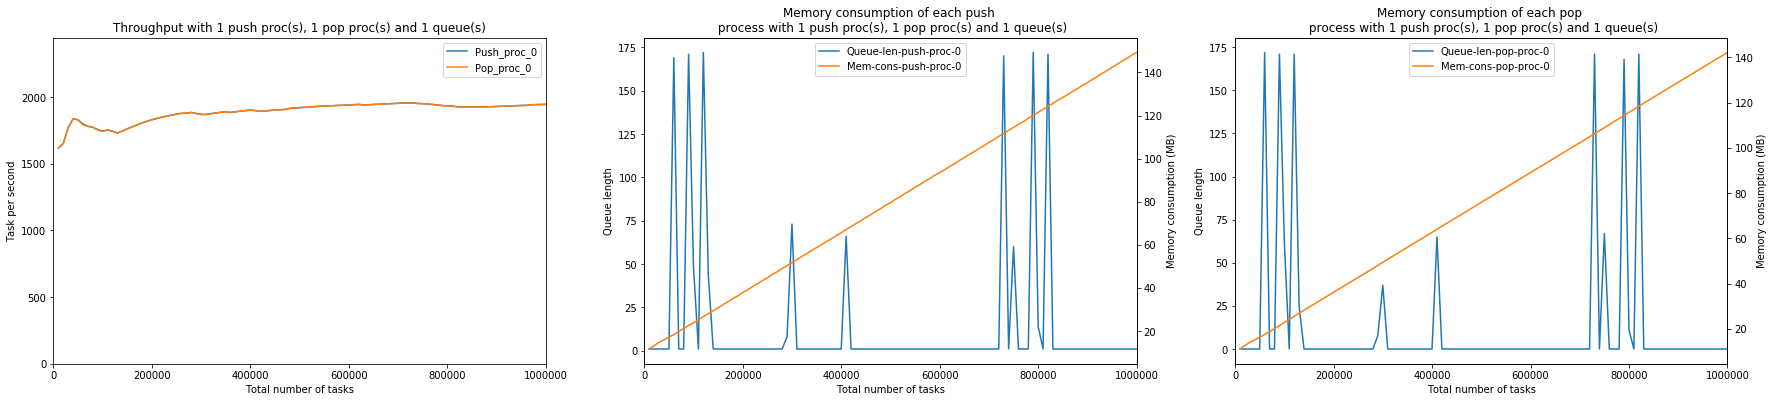

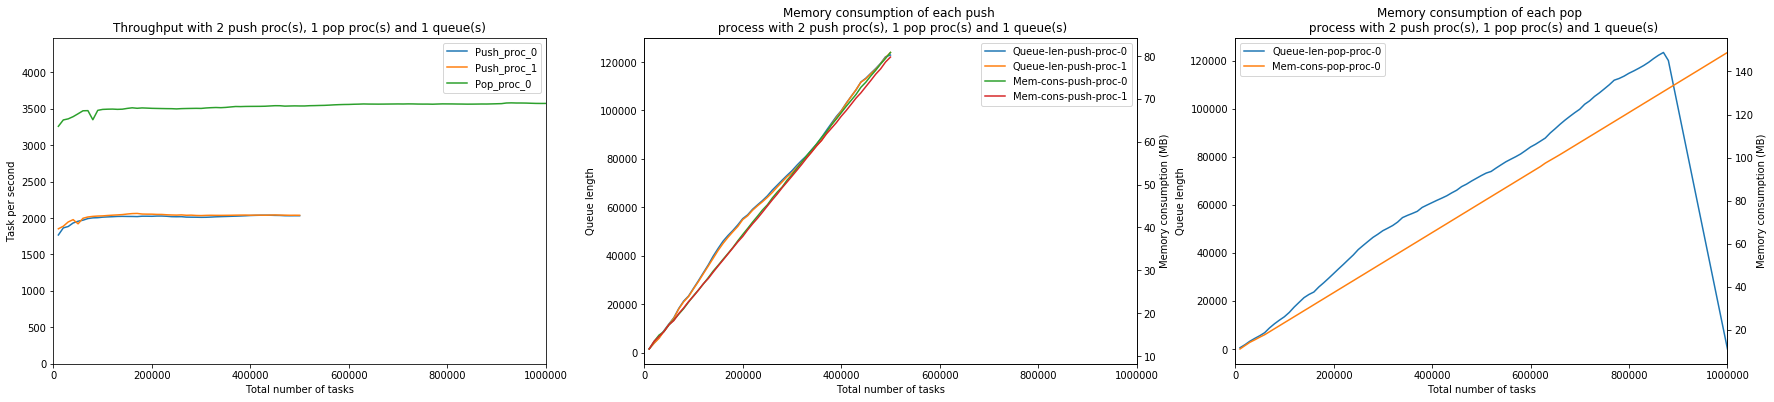

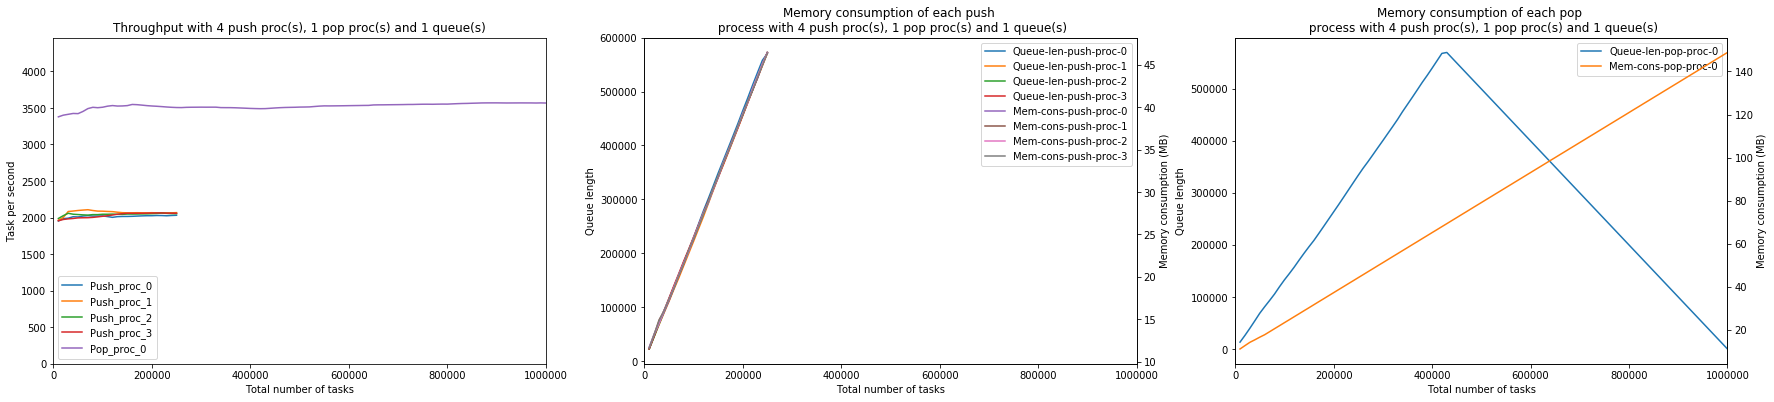

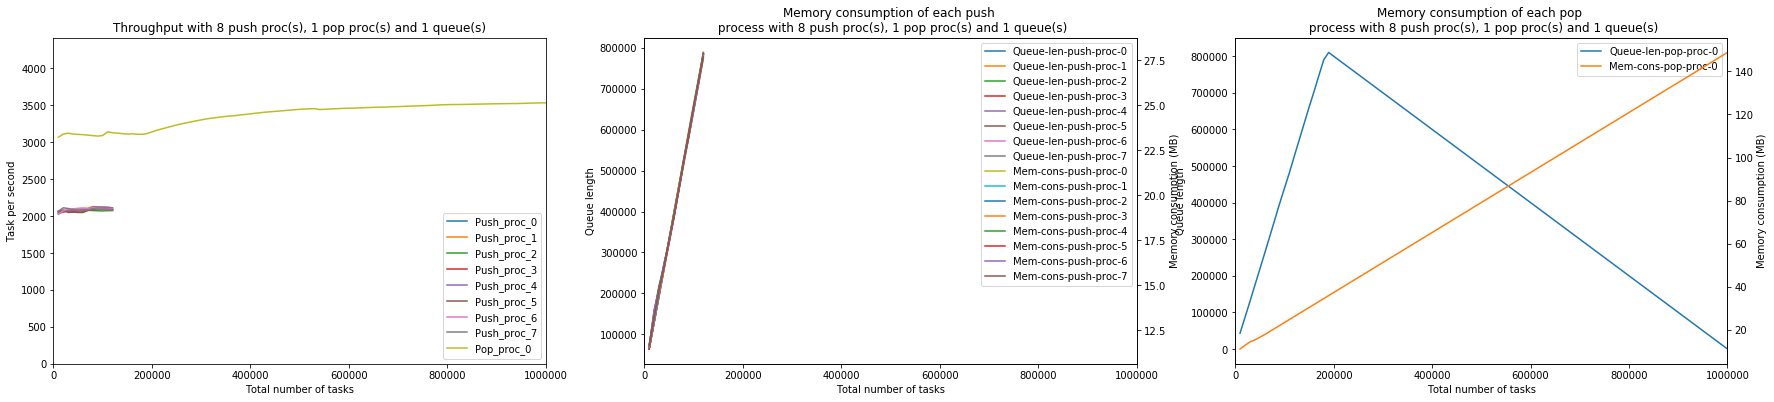

In [19]:
num_push_procs_list = [1,2,4,8]
num_pop_procs = 1
num_queues = 1
num_samples = 100

for num_push_procs in num_push_procs_list:
    fig, axes = plt.subplots(1,3)
    fig.set_size_inches(30, 6)
    #print axes
    get_throughput_plot(num_push_procs, num_pop_procs, num_queues, num_samples,axes[0])
    get_queue_push_plot(num_push_procs, num_pop_procs, num_queues, num_samples,axes[1])
    get_queue_pop_plot(num_push_procs, num_pop_procs, num_queues, num_samples, axes[2])

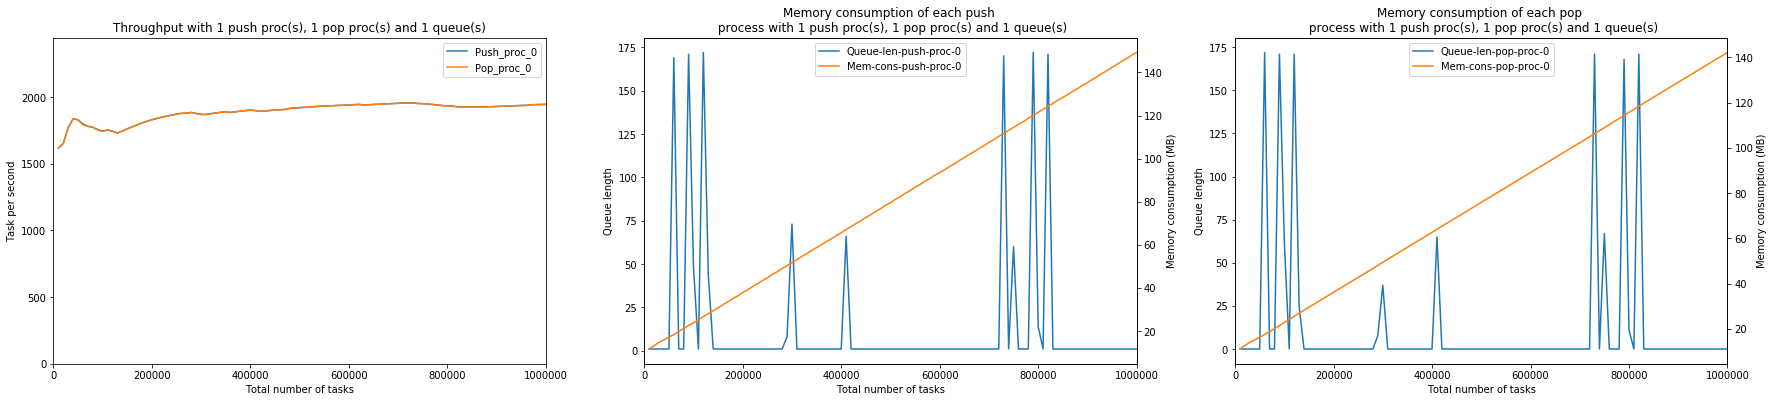

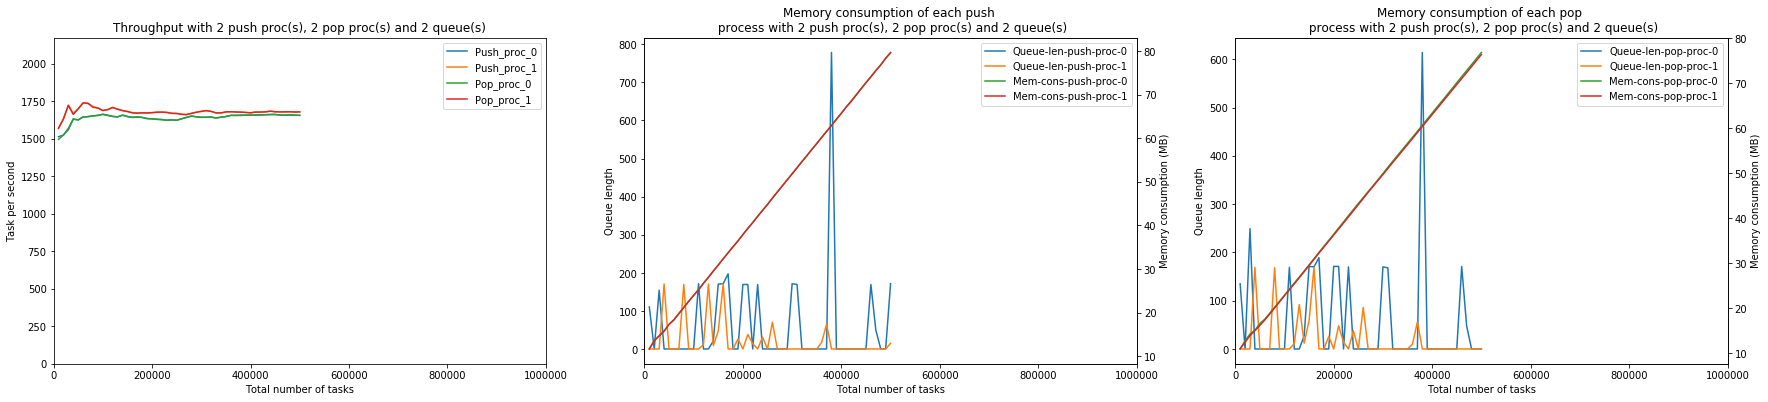

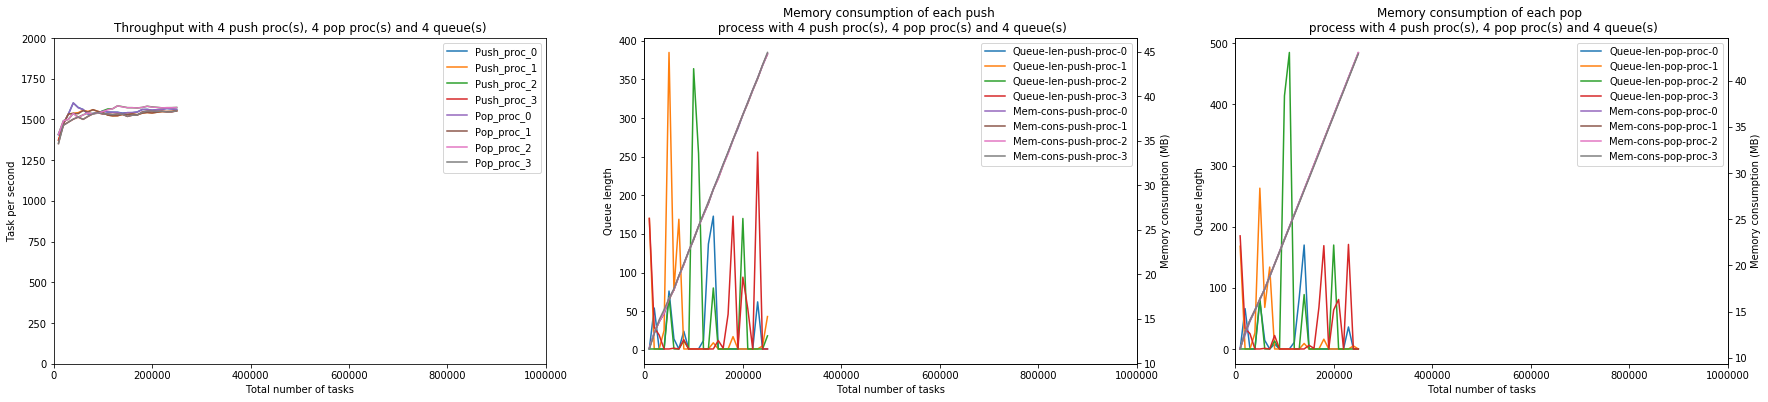

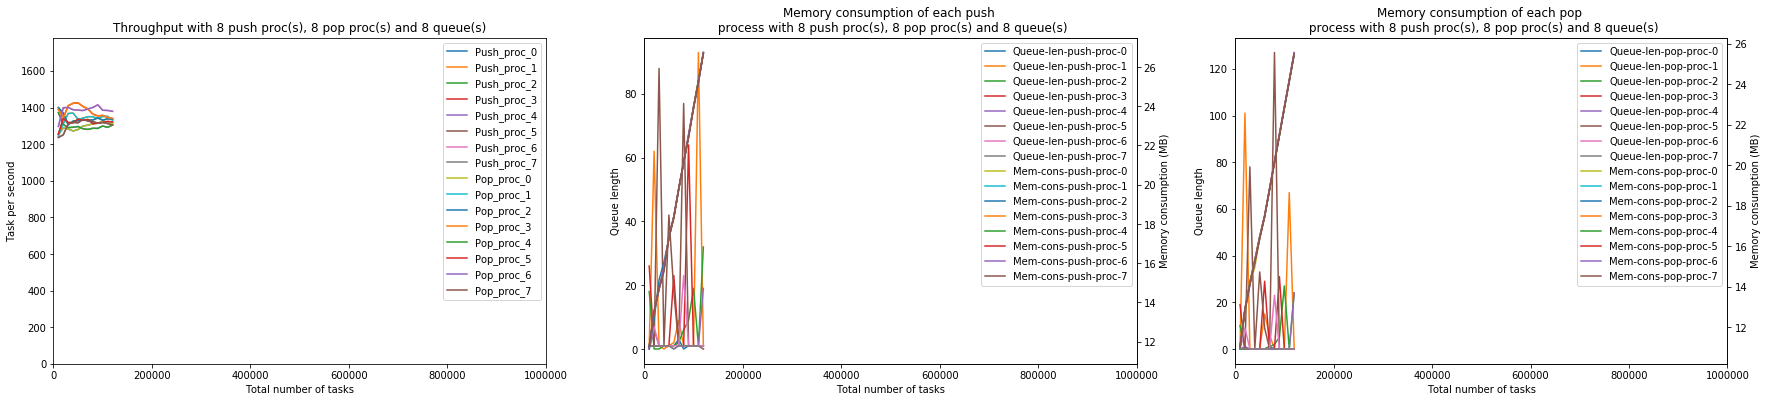

In [20]:
num_queues_list = [1,2,4,8]
num_samples = 100

for num_queues in num_queues_list:
    num_push_procs= num_queues
    num_pop_procs= num_queues
    
    fig, axes = plt.subplots(1,3)
    fig.set_size_inches(30, 6)
    
    get_throughput_plot(num_push_procs, num_pop_procs, num_queues, num_samples,axes[0])
    get_queue_push_plot(num_push_procs, num_pop_procs, num_queues, num_samples,axes[1])
    get_queue_pop_plot(num_push_procs, num_pop_procs, num_queues, num_samples, axes[2])

In [21]:
import numpy as np

def fill_timing_data(df, df_err, num_push_procs, num_pop_procs, num_queues):
    
    time_taken_push_procs =  [0.0 for _ in range(3)]
    time_taken_pop_procs =  [0.0 for _ in range(3)]    
    ttc = [0.0 for _ in range(3)]
    mem_cons = [0.0 for _ in range(3)]
    base_mem_cons = [0.0 for _ in range(3)]
        
    for i in range(3):
    
        DATA = './data_27_Apr/push_%s_pop_%s_q_%s_trial_%s'%(num_push_procs, num_pop_procs, num_queues,i)
    
        push_data = glob.glob('%s/push*.txt'%DATA)
    
        min_push = 0.0
        max_push = 0.0
    
        for f1 in push_data:
        
            f = open(f1,'r')        
            lines = f.readlines()
            f.close()
        
            base_mem_cons[i] += float(lines[1].strip().split(' ')[3].strip())
            for line in lines:
            
                cur_time = float(line.strip().split(' ')[0].strip())
            
                if min_push == 0.0:
                    min_push = cur_time
                    max_push = cur_time
                
                if cur_time < min_push:
                    min_push = cur_time
                    
                if cur_time > max_push:
                    max_push = cur_time
    
            mem_cons[i] += float(line.strip().split(' ')[3].strip())
    
        pop_data = glob.glob('%s/pop*.txt'%DATA)
        
        min_pop = 0.0
        max_pop = 0.0
    
        for f1 in pop_data:
        
            f = open(f1,'r')        
            lines = f.readlines()
            f.close()
        
            base_mem_cons[i] += float(lines[1].strip().split(' ')[3].strip())
            for line in lines:
            
                cur_time = float(line.strip().split(' ')[0].strip())
            
                if min_pop == 0.0:
                    min_pop = cur_time
                    max_pop = cur_time
                
                if cur_time < min_pop:
                    min_pop = cur_time
                if cur_time > max_pop:
                    max_pop = cur_time
                    
            mem_cons[i] += float(line.strip().split(' ')[3].strip())
                
        time_taken_push_procs[i] =  max_push - min_push
        time_taken_pop_procs[i] =  max_pop - min_pop    
        ttc[i] = max(max_pop,max_push) - min(min_pop, min_push)
        
    vals = [np.mean(time_taken_push_procs), 
            np.mean(time_taken_pop_procs),
            np.mean(ttc),
            np.mean(mem_cons),
            np.mean(base_mem_cons)]
    
    #print df.loc['%s,%s,%s'%(num_push_procs, num_pop_procs, num_queues)]
    df.loc['%s,%s,%s'%(num_push_procs, num_pop_procs, num_queues)] = vals
    
    vals = [np.std(time_taken_push_procs), 
            np.std(time_taken_pop_procs),
            np.std(ttc),
            np.std(mem_cons),
            np.std(base_mem_cons)]
    
    df_err.loc['%s,%s,%s'%(num_push_procs, num_pop_procs, num_queues)] = vals
    
    return df, df_err

In [22]:
#TTC
num_push_procs_list = [1,2,4,8]
num_pop_procs = 1
num_queues = 1

cols = ['Time taken for all push procs','Time taken for all pop procs','TTC', 'Total Peak memory consumption','Total Baseline memory consumption']
index = ['%s,1,1'%i for i in num_push_procs_list]
#index = []
index.extend(['%s,%s,%s'%(i,i,i) for i in num_push_procs_list[1:]])

num_push_procs_list_2 = [16,32,64,128]
index.extend(['%s,%s,%s'%(i,i,i) for i in num_push_procs_list_2])

df = pd.DataFrame(columns=cols, index=index)
df_err = pd.DataFrame(columns=cols, index=index)

for num_push_procs in num_push_procs_list:
    df, df_err = fill_timing_data(df, df_err, num_push_procs, num_pop_procs, num_queues)

for num_push_procs in num_push_procs_list:
    num_pop_procs = num_push_procs
    num_queues = num_push_procs
    df, df_err = fill_timing_data(df, df_err, num_push_procs, num_pop_procs, num_queues)
    
for num_push_procs in num_push_procs_list_2:
    num_pop_procs = num_push_procs
    num_queues = num_push_procs
    df, df_err = fill_timing_data(df, df_err, num_push_procs, num_pop_procs, num_queues)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

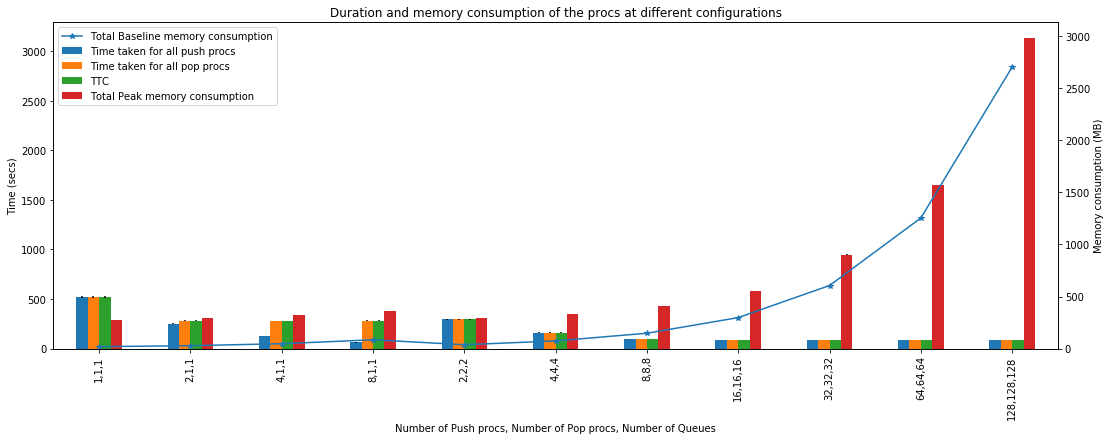

In [23]:
#print df
#print df_err

fig,ax = plt.subplots(1,1)
fig.set_size_inches(18,6)

df3 = df['Total Baseline memory consumption']
ax3 = df3.plot(ax=ax,use_index=True,kind='line',marker='*')

ax1 = df.plot(ax=ax, kind='bar', y=['Time taken for all push procs','Time taken for all pop procs','TTC', 'Total Peak memory consumption'],
              yerr=df_err, 
              title='Duration and memory consumption of the procs at different configurations', use_index = True)

df2 = pd.DataFrame(columns=['Total Peak memory consumption'], index=df.index)
ax2 = df2.plot(ax=ax, kind='bar', secondary_y=True, use_index=True)

ax1.set_xlabel('Number of Push procs, Number of Pop procs, Number of Queues')
ax1.set_ylabel('Time (secs)')
ax2.set_ylabel('Memory consumption (MB)')
ax2.set_ylim(0,df['Total Peak memory consumption'].max())

patches, labels = ax1.get_legend_handles_labels()

ax1.legend(patches, labels, loc='best')
plt.xticks(rotation=0)